In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

data = pd.read_csv("ecg_data_summary.csv")
data.head(10)

,PersonID,Age,Sex,Arrhythmia,BPM,Average_RR_Interval,Min_RR_Interval,Max_RR_Interval,PT_Interval,RR_Median,Local_RR_Intervals
0,JS00001,85.0,Male,True,55.299539,1.085000,0.48,1.76,1.085000,1.00,NaN
1,JS00002,59.0,Female,True,88.607595,0.677143,0.44,1.20,0.677143,0.64,"0.10000000000000003,0.36,0.14,0.16000000000000003"
2,JS00004,66.0,Male,True,50.119332,1.197143,0.52,2.64,1.197143,1.20,NaN
3,JS00005,73.0,Female,True,65.375303,0.917778,0.40,1.98,0.917778,0.80,NaN
4,JS00006,46.0,Female,True,71.428571,0.840000,0.48,1.62,0.840000,0.70,0.9200000000000002
5,JS00007,80.0,Female,True,76.530612,0.784000,0.38,1.46,0.784000,0.84,NaN
6,JS00008,46.0,Male,False,42.016807,1.428000,0.88,3.40,1.428000,0.94,NaN
7,JS00009,45.0,Male,True,47.619048,1.260000,0.72,1.96,1.260000,1.08,NaN
8,JS00010,47.0,Female,True,47.191011,1.271429,0.60,2.10,1.271429,1.28,NaN
9,JS00011,63.0,Male,True,79.710145,0.752727,0.38,1.08,0.752727,0.78,0.07999999999999996


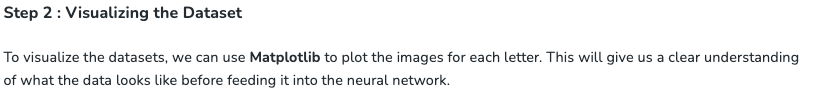

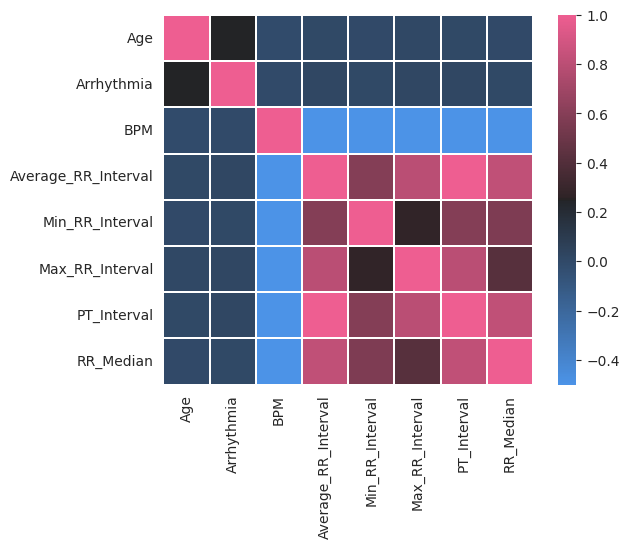

In [12]:
data["Arrhythmia"] = data["Arrhythmia"].astype(int)
numeric_data = data.select_dtypes(include=[float, int])
corr = numeric_data.corr(method="pearson")
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=0.2)
plt.show()

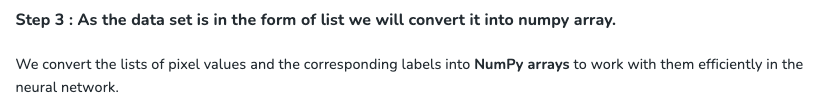

In [ ]:
import numpy as np

# Load numeric data only, skipping headers
data = np.genfromtxt("ecg_data_summary.csv", delimiter=",", skip_header=1, usecols=(1, 3, 4, 5, 6, 7, 8, 9))

print(data)

[[85.                 nan 55.29953917 ...  1.76        1.085
   1.        ]
 [59.                 nan 88.60759494 ...  1.2         0.67714286
   0.64      ]
 [66.                 nan 50.11933174 ...  2.64        1.19714286
   1.2       ]
 ...
 [36.                 nan 58.69565217 ...  2.48        1.02222222
   0.9       ]
 [30.                 nan 78.57142857 ...  1.32        0.76363636
   0.62      ]
 [ 6.                 nan 80.53691275 ...  1.36        0.745
   0.68      ]]


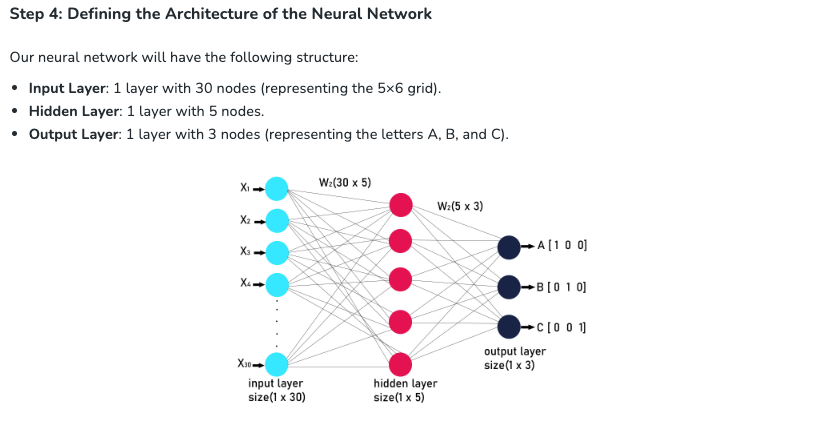

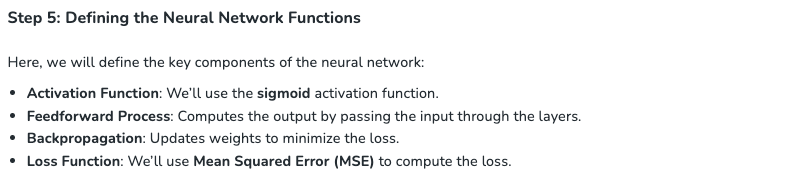

In [ ]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)    # input from layer 1
	a1 = sigmoid(z1)  # out put of layer 2
	z2 = a1.dot(w2)   # input of out layer
	a2 = sigmoid(z2)  # output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):

	# hidden layer
	z1 = x.dot(w1)
	a1 = sigmoid(z1)
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)

	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)

	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))

	return(w1, w2)

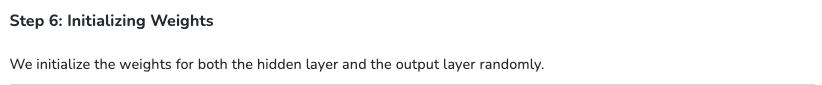

In [ ]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

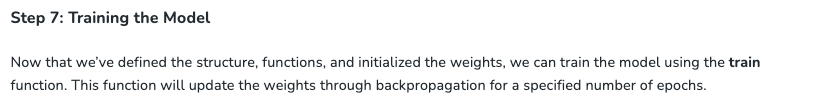

In [ ]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

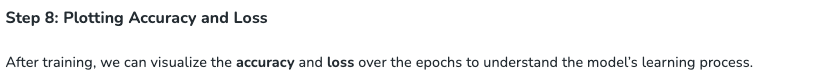

In [ ]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

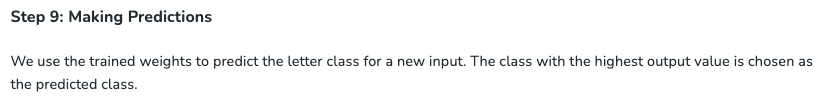

In [ ]:
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()
# Example: Predicting for letter 'B'
predict(x[1], w1, w2)